# Exercise Description

Try to build a classifier for the MNIST dataset that achieves over 97% accuaracy on the test set. 
> **Hint:** the *KNeighborsClassifier* works queite well for this task; you just need to find good hyperparameter values (try a gird search on the `weights` and `n_neighbors`hyperaparameters).

# Imports

In [1]:
# mnist dataset load
from sklearn.datasets import fetch_openml

# showing images
import matplotlib.pyplot as plt

# for array handling
import numpy as np

# for getting random integer number
import random

# for creating train and testsplits
from sklearn.model_selection import train_test_split

# import the classifier
from sklearn.neighbors import KNeighborsClassifier as knc

# for hyperparamter tuning
from sklearn.model_selection import GridSearchCV

# import function for data augementation from Exercise02.ipynb
import nbimporter
#from Exercise02 import get_shifted_images

# import pandas for dataframe
import pandas as pd

# Load the MNIST Dataset

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = mnist.data
y = mnist.target

# Explore the data

In [5]:
X.shape, y.shape

((70000, 784), (70000,))

In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
type(y)

pandas.core.series.Series

In [8]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [10]:
np.sqrt(784)

28.0

In [11]:
X.iloc[0].min(), X.iloc[0].max()

(0.0, 255.0)

In [12]:
# create a function to plot a random image
def plot_random_image(X,y,num_images=5):
    '''
        Function that plots random greyscale images in X with corresponding label in y.
        How many images should be plot can be specified with the num_images parameter. Default to 5.
    '''
    if num_images % 5 == 0:
        nrows = num_images // 5
    else:
        nrows = num_images // 5 + 1
    fig, axes = plt.subplots(nrows=nrows,  ncols=num_images if num_images <= 5 else 5,figsize=(10,7))

    for i in range(num_images):
        if num_images == 1:
            ax = axes
        elif (num_images > 1) and (num_images <= 5):
            ax = axes[i]
        else:
            ax = axes[i//5,i%5]
        
        # get a random integer between 0 and the max number of available pictures
        random_int = random.randint(0,X.shape[0]-1)

        # plot the picture using matplotlib imshow function with corresponding label
        ax.imshow(X.iloc[random_int].values.reshape(28,28), cmap='gray',vmin=0,vmax=255)
        ax.title.set_text("Image with label " + y.iloc[random_int])

        # hide axis
        ax.axis(False)
    # remove unused axes
    if num_images > 1:
        for ax in axes.flat[num_images:]:
            ax.remove()
    
    plt.tight_layout(pad=1)
    plt.show()

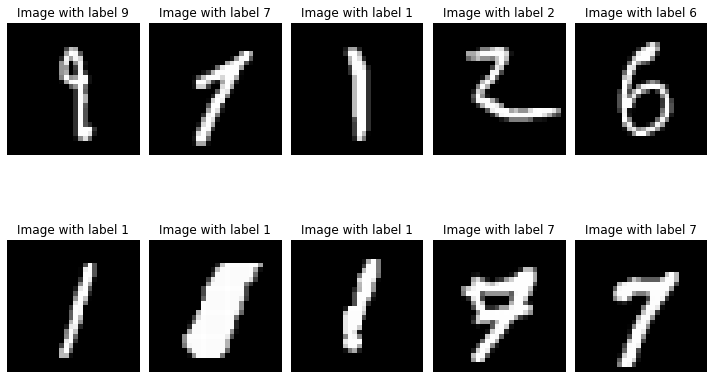

In [13]:
plot_random_image(X,y,num_images=10)

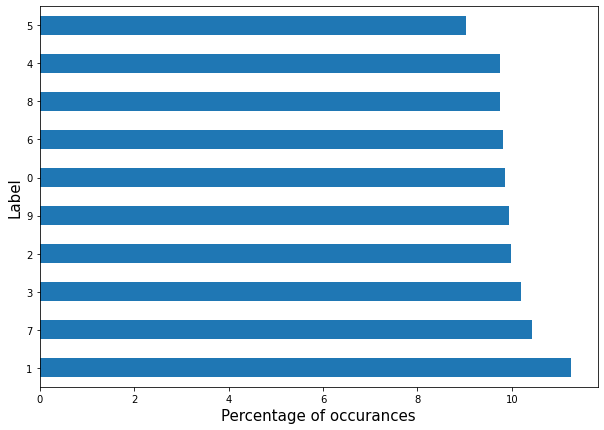

In [14]:
np.round(y.value_counts()/len(y)*100,2).plot(kind='barh',figsize=(10,7),style='ggplot')
plt.xlabel('Percentage of occurances',fontsize=15)
plt.ylabel('Label',fontsize=15)
plt.show()

# Create train and testsplits

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
len(X_train), len(y_train), len(X_test), len(y_test)

(56000, 56000, 14000, 14000)

## Check if distribution of labels is the same in train and test splits

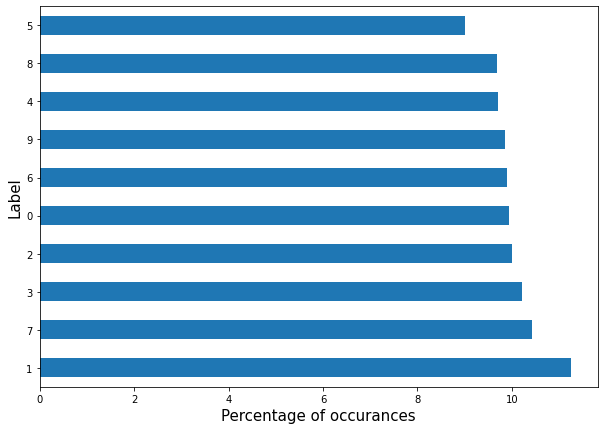

In [17]:
np.round(y_train.value_counts()/len(y_train)*100,2).plot(kind='barh',figsize=(10,7),style='ggplot')
plt.xlabel('Percentage of occurances',fontsize=15)
plt.ylabel('Label',fontsize=15)
plt.show()

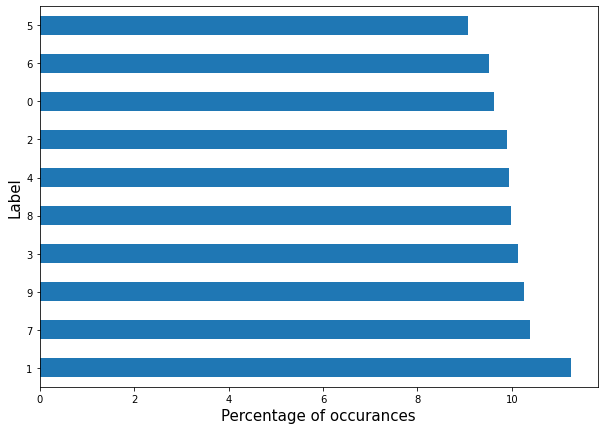

In [18]:
np.round(y_test.value_counts()/len(y_test)*100,2).plot(kind='barh',figsize=(10,7),style='ggplot')
plt.xlabel('Percentage of occurances',fontsize=15)
plt.ylabel('Label',fontsize=15)
plt.show()

In [19]:
# define the knc classifier with default values
knc_clf = knc()

# fit the model
knc_clf.fit(X_train,y_train)

# evaluate the model
knc_score = knc_clf.score(X_test,y_test)

In [20]:
knc_score

0.9689285714285715

# Hyperparamter tuning

In [93]:
# fit the knc classifier with default values
knc_clf = knc()

In [94]:
# define the parameter space
parameters = {'n_neighbors':[3,5,10], 'weights':['uniform', 'distance']}

# define the gridsearched clf with paramters
clf = GridSearchCV(knc_clf, parameters)

In [95]:
# fit the clf to find best paramters
clf.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10],
                         'weights': ['uniform', 'distance']})

In [96]:
# get the best combination of parameters
clf.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [97]:
# get the best estimator of gridsearch
best_clf = clf.best_estimator_

In [98]:
# evaluate the best estimator on the test set
best_clf.score(X_test, y_test)

0.9722142857142857

# Call the function for data augmentation from Exercise02.ipynb

In [21]:
X.shape, y.shape

((70000, 784), (70000,))

In [22]:
y_train.iloc[0]

'2'

In [23]:
len(X_train)

56000

In [56]:
# function that was written in Exercise02.ipynb
# for shifting the image
from scipy.ndimage import shift

def get_shifted_images(img,shift_by=1):
    """
        Function that returns 4 shifted version of the passed image, #shift pixel shifted in each direction and reshaped. 
    """
    return([shift(img,[shift_by,0]).astype(int).reshape(1,-1),
           shift(img,[0,shift_by]).astype(int).reshape(1,-1),
           shift(img,[-shift_by,0]).astype(int).reshape(1,-1),
           shift(img,[0,-shift_by]).astype(int).reshape(1,-1)])

Use [Joblib](https://stackoverflow.com/questions/61960177/how-to-use-joblib-parallel-to-parallelize-a-loop-with-some-continue-in-it) for Multiprocessing to speed up data augmentation time

In [29]:
from math import sqrt
from joblib import Parallel, delayed

In [102]:
%%time
# we can clearly see normal looping is much slower
for i in range(len(X_train)):
    get_shifted_images(X_train.iloc[i].values.reshape(28,28))

CPU times: user 17.1 s, sys: 32.3 ms, total: 17.1 s
Wall time: 17.1 s


In [103]:
%%time
shifted_images_all_directions = Parallel(n_jobs=2)(delayed(get_shifted_images)(X_train.iloc[i].values.reshape(28,28)) for i in range(len(X_train)))

CPU times: user 2.76 s, sys: 4.92 s, total: 7.68 s
Wall time: 12.2 s


In [104]:
shifted_images_all_directions_reshaped = np.array(shifted_images_all_directions).reshape(-1,784)

In [105]:
y_augmented_labels = []

In [106]:
for i in range(len(y_train)):
    y_augmented_labels.append([y_train.iloc[i]]*4) 

In [107]:
y_augmented_labels_reshaped = np.array(y_augmented_labels).reshape(-1)

In [109]:
len(shifted_images_all_directions_reshaped), len(y_augmented_labels_reshaped)

(224000, 224000)

In [130]:
X_train_augmented = pd.DataFrame(shifted_images_all_directions_reshaped,columns=X.columns)
y_train_augmented = pd.Series(y_augmented_labels_reshaped)

In [131]:
X_train_augmented_shuffled = X_train_augmented.sample(len(X_train_augmented),random_state=711)
y_train_augmented_shuffled = y_train_augmented.sample(len(y_train_augmented),random_state=711)

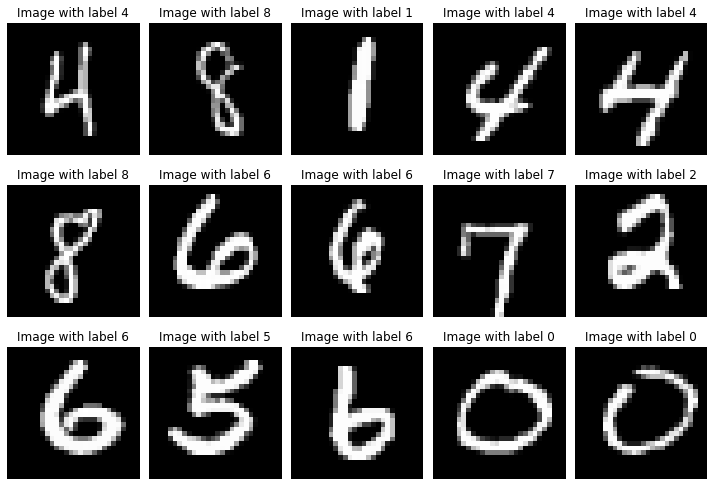

In [132]:
# check if labelling worked
plot_random_image(X_train_augmented_shuffled,y_train_augmented_shuffled,15)

In [133]:
# define the knc classifier with default values
knc_clf = knc(n_neighbors=3,weights='distance')

# fit the model
knc_clf.fit(X_train_augmented,y_train_augmented)

# evaluate the model
knc_score = knc_clf.score(X_test,y_test)

In [140]:
knc_score

0.9773571428571428